In [1]:
from keras.datasets import mnist
import numpy as np 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
def data_proccess(x,y):
  new_y = []
  new_x = []
  ###
  for i in range(len(y)):
    if y[i] == 2:
      new_y.append(-1)
      new_x.append(x[i])
    elif y[i] == 7:
      new_y.append(1)
      new_x.append(x[i])

  new_y = np.array(new_y)
  new_x = np.array(new_x)
  new_x = new_x/255;

  new_x = new_x.reshape(new_x.shape[0], -1)
  print(new_x.shape)
  print(new_y.shape)
  return new_x, new_y


  

##pre - proccess

In [3]:
print(x_train.shape)
print(y_train) 
new_y_train = []
new_x_train = []

new_y_test = []
new_x_test = []

new_x_train , new_y_train = data_proccess(x_train, y_train)
new_x_test , new_y_test = data_proccess(x_test, y_test)

def miu(w,b,x,y):
  e = 1+np.exp(np.dot(-y, np.dot(x,w)+b))
  return 1/e

def J_W(w,b,x,y): 
  sum = 0
  for i in range(len(x)):
    mu = miu(w,b,x[i],y[i])
    sum += -x[i]* y[i] * np.exp(-y[i] *(b + np.dot(x[i], w) ))*(mu)
  return sum/len(x)

def J_B(w,b,x,y): 
  sum = 0
  for i in range(len(x)):
    mu = miu(w,b,x[i],y[i])
    sum += -y[i]* np.exp(-y[i] *(b + np.dot(x[i], w) ))*(mu)
  return sum/len(x)

def J(w,b,x,y):
  sum = 0
  for i in range(len(x)):
    sum =sum + np.log(1+ np.exp(-y[i] * (b+ np.dot(x[i], w) )))
  return sum/len(x)

def forward(x, y, learning_rate):
  w = np.zeros(x.shape[1])
  b = 0
  error = []
  for i in range(50):
    wNew = w - learning_rate*J_W(w,b,x,y)
    bNew = b - learning_rate*J_B(w,b,x,y)
    error.append( J(w,b,x,y))
    #print(error[i])
    w = wNew
    b = bNew
  return w,b, error

def accuracy (w,b,x,y):
  counter = 0
  for i in range(len(x)):
    sgn = np.sign(b+ np.dot(x[i], w))
    if (y[i]==sgn):
      counter += 1
  return counter/len(x)


(60000, 28, 28)
[5 0 4 ... 5 6 8]
(12223, 784)
(12223,)
(2060, 784)
(2060,)


[0.6931471805600661, 0.684329086750386, 0.6757149275959553, 0.6672991246958242, 0.6590762610849115, 0.6510410768874578, 0.64318846489929, 0.635513466154622, 0.6280112655219623, 0.6206771873633657, 0.6135066912830863, 0.6064953679843459, 0.599638935247033, 0.5929332340343655, 0.5863742247326034, 0.5799579835248776, 0.5736806988977634, 0.567538668277673, 0.5615282947925441, 0.5556460841538096, 0.5498886416528843, 0.5442526692661539, 0.538734962862518, 0.5333324095075175, 0.5280419848583296, 0.5228607506441589, 0.5177858522270721, 0.5128145162383385, 0.5079440482861621, 0.5031718307306893, 0.4984953205228137, 0.4939120471035192, 0.4894196103608456, 0.4850156786419624, 0.48069798681796827, 0.4764643343994408, 0.47231258370085344, 0.46824065805224957, 0.4642465400567433, 0.4603282698924963, 0.45648394365804434, 0.4527117117598307, 0.44900977734108694, 0.4453763947509972, 0.4418098680534624, 0.4383085495745718, 0.434870838488063, 0.43149517943805493, 0.428180061198348, 0.42492401536759195]
[

Text(0, 0.5, 'Error')

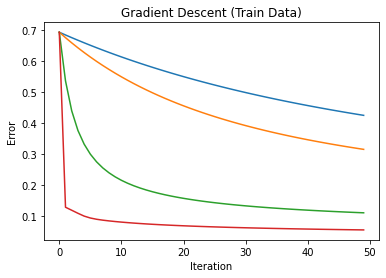

In [11]:
import matplotlib.pyplot as plt
acc_train = []
learning_rate = [0.005,0.01,0.1,1]
for i in learning_rate:
  w,b,error = forward(new_x_train, new_y_train, i)
  acc_train.append(accuracy(w,b,new_x_train, new_y_train))
  print(error)
  plt.plot(error)
plt.title('Gradient Descent (Train Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')


In [30]:
print ("Accuray for learning rate = 0.005 is ",acc_train[0]*100 , "% ")
print ("Accuray for learning rate = 0.01 is ",acc_train[1]*100 , "% ")
print ("Accuray for learning rate = 0.1 is ",acc_train[2]*100 , "% ")
print ("Accuray for learning rate = 1 is ",acc_train[3]*100 , "% ")

Accuray for learning rate = 0.005 is  96.4084103738853 % 
Accuray for learning rate = 0.01 is  96.39204777877771 % 
Accuray for learning rate = 0.1 is  97.30017180724863 % 
Accuray for learning rate = 1 is  98.41282827456435 % 


[0.6931471805599106, 0.683987309577962, 0.6750673895825914, 0.6663785543968032, 0.6579123931676893, 0.6496609234231002, 0.641616564939453, 0.6337721146287982, 0.626120722592175, 0.6186558694351482, 0.6113713448991196, 0.6042612278280287, 0.5973198674628418, 0.5905418660354075, 0.5839220626174998, 0.5774555181694908, 0.571137501725519, 0.564963477647104, 0.5589290938749766, 0.5530301711082698, 0.5472626928412613, 0.5416227961898376, 0.5361067634427443, 0.5307110142760179, 0.5254320985727037, 0.5202666897939394, 0.5152115788513473, 0.5102636684347185, 0.505419967752741, 0.500677587648226, 0.4960337360528035, 0.4914857137492979, 0.48703091041309193, 0.4826668009065977, 0.4783909418035402, 0.47420096812218787, 0.4700945902487622, 0.46606959103426504, 0.46212382304972194, 0.4582552059864323, 0.4544617241892307, 0.4507414243120667, 0.44709241308633774, 0.4435128551934227, 0.4400009712337691, 0.4365550357856916, 0.4331733755477413, 0.4298543675591442, 0.42659643749332815, 0.4233980580201145]


Text(0, 0.5, 'Error')

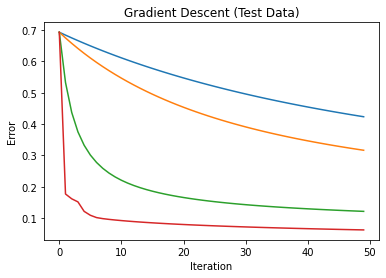

In [10]:

learning_rate = [0.005,0.01,0.1,1]
acc_test = []
for i in learning_rate:
  w,b,error = forward(new_x_test, new_y_test, i)
  acc_test.append(accuracy(w,b,new_x_test, new_y_test))
  print(error)
  plt.plot(error)
plt.title('Gradient Descent (Test Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')

In [31]:
print ("Accuray for learning rate = 0.005 is ",acc_test[0]*100 , "% ")
print ("Accuray for learning rate = 0.01 is ",acc_test[1]*100 , "% ")
print ("Accuray for learning rate = 0.1 is ",acc_test[2]*100 , "% ")
print ("Accuray for learning rate = 1 is ",acc_test[3]*100 , "% ")

Accuray for learning rate = 0.005 is  95.53398058252426 % 
Accuray for learning rate = 0.01 is  95.87378640776699 % 
Accuray for learning rate = 0.1 is  96.6504854368932 % 
Accuray for learning rate = 1 is  98.10679611650485 % 


In [17]:
import random

def J_W_SGD(w,b,x,y,k): 
  sum = 0
  a = int(len(x/k))
  for i in range(a):
    print(i)
    for j in range(i*k, (i+1)*(k)):
      mu = miu(w,b,x[j],y[j])

      sum += -x[j]* y[j] * np.exp(-y[j] *(b + np.dot(x[j], w) ))*(mu)
  return sum/len(x)

def J_B_SGD(w,b,x,y,k): 
  sum = 0
  a = int(len(x/k))
  for i in range(a):
    for j in range(i*k, k*(i+1)):
      mu = miu(w,b,x[j],y[j])
      sum += -y[j]* np.exp(-y[j] *(b + np.dot(x[j], w) ))*(mu)
  return sum/len(x)

def J_SGD(w,b,x,y,k):
  sum = 0
  a = int(len(x/k))
  for i in range(a):
    for j in range(i*k, k*(i+1)):
      sum =sum + np.log(1+ np.exp(-y[j] * (b+ np.dot(x[j], w) )))
  return sum/len(x)


def forward_SGD(batch, x, y, learning_rate):
  w = np.zeros((x.shape[1]))
  b = 0
  error = []
  for i in range(100):
    batchs = random.sample(range(0, len(x)), batch)
    w_new = w - learning_rate * J_W(w, b, x[batchs], y[batchs])
    b_new = b - learning_rate * J_B(w, b, x[batchs], y[batchs])
    error.append(J(w, b, x, y))
    w = w_new
    b = b_new
  return w, b, error



[0.6931471805600661, 0.6754623914348207, 0.6661381931714723, 0.6543704361909859, 0.6423701625623144, 0.6360376778273888, 0.6189089937902207, 0.6151771982996459, 0.6116157011792234, 0.6024166890068848, 0.5938772465140891, 0.5829742681920738, 0.576542801302267, 0.5736328269391623, 0.5713806340520126, 0.5597877709477836, 0.5512452735615446, 0.5477995938946001, 0.5471828361580637, 0.5367675650212008, 0.538313100704449, 0.5286690622870958, 0.5180737177473611, 0.5206702981295452, 0.5135297682439828, 0.50625937306771, 0.5036278102173977, 0.4965423959426688, 0.4926786062848736, 0.48927297918704105, 0.486437347101946, 0.48481858434083014, 0.486386911167464, 0.47493873279534693, 0.47917826576650346, 0.4661845760956759, 0.4683222892737009, 0.4575189617919112, 0.44864279869288104, 0.44074538670938035, 0.44092260599763555, 0.4354405286351255, 0.43210097461697505, 0.4280722149291847, 0.4250558503703488, 0.41901020240841635, 0.41463849084667964, 0.4115375555829049, 0.40713039724404027, 0.403366218156

Text(0, 0.5, 'Error')

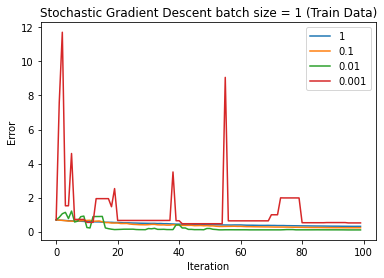

In [19]:
acc_train_SGD1 = []
learning_rate = [0.005,0.01,0.1,1]

for i in learning_rate:
  w,b,error = forward_SGD(1,new_x_train, new_y_train, i)
  acc_train_SGD1.append(accuracy(w,b,new_x_train, new_y_train))
  print(error)
  plt.plot(error)
plt.legend(['1', '0.1', '0.01', '0.001'])
plt.title('Stochastic Gradient Descent batch size = 1 (Train Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')



In [34]:
print ("Accuray of SGD for learning rate = 0.005 is ",acc_train_SGD1[0]*100 , "% ")
print ("Accuray of SGD for learning rate = 0.01 is ",acc_train_SGD1[1]*100 , "% ")
print ("Accuray of SGD for learning rate = 0.1 is ",acc_train_SGD1[2]*100 , "% ")
print ("Accuray of SGD for learning rate = 1 is ",acc_train_SGD1[3]*100 , "% ")

Accuray of SGD for learning rate = 0.005 is  96.06479587662604 % 
Accuray of SGD for learning rate = 0.01 is  95.96662030598053 % 
Accuray of SGD for learning rate = 0.1 is  96.34295999345495 % 
Accuray of SGD for learning rate = 1 is  96.13024625705637 % 


[0.6931471805599106, 0.686438442473034, 0.6764064754984518, 0.6765743242431438, 0.6626890388133281, 0.6555544508480953, 0.6631155546094786, 0.6629221733818988, 0.6633072068661016, 0.6629692979033133, 0.6628983220019211, 0.6492272134921923, 0.6218424307698549, 0.6001954469736119, 0.5866475854486239, 0.5716427856893372, 0.5753942018055445, 0.5763205795515846, 0.5612625315013472, 0.5485299630410132, 0.5394773221286365, 0.540674101171775, 0.5373117336049696, 0.5290388125381178, 0.5257877173515295, 0.5251953402617119, 0.521191980060395, 0.5181658590219812, 0.5148763776607779, 0.5111317484570558, 0.5081943700377931, 0.49967045256190934, 0.49225929855892114, 0.5010465074157793, 0.5011121179282105, 0.4920611524156958, 0.48895016536936187, 0.48855038638817694, 0.4784506248029952, 0.46967717279281335, 0.4660057404678879, 0.4605407085842546, 0.4581951084873937, 0.4558596755013462, 0.4482138773457348, 0.4461916023217959, 0.4436690049997257, 0.4381953864209537, 0.4357459107162459, 0.432680868035589

Text(0, 0.5, 'Error')

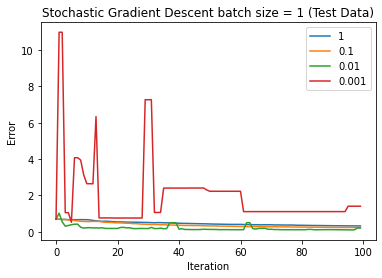

In [35]:
acc_test_SGD1 = []
learning_rate = [0.005,0.01,0.1,1]

for i in learning_rate:
  w,b,error = forward_SGD(1,new_x_test, new_y_test, i)
  acc_test_SGD1.append(accuracy(w,b,new_x_test, new_y_test))
  print(error)
  plt.plot(error)
plt.legend(['1', '0.1', '0.01', '0.001'])
plt.title('Stochastic Gradient Descent batch size = 1 (Test Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')


In [36]:
print ("Accuray of SGD for learning rate = 0.005 is ",acc_test_SGD1[0]*100 , "% ")
print ("Accuray of SGD for learning rate = 0.01 is ",acc_test_SGD1[1]*100 , "% ")
print ("Accuray of SGD for learning rate = 0.1 is ",acc_test_SGD1[2]*100 , "% ")
print ("Accuray of SGD for learning rate = 1 is ",acc_test_SGD1[3]*100 , "% ")

Accuray of SGD for learning rate = 0.005 is  94.90291262135922 % 
Accuray of SGD for learning rate = 0.01 is  95.67961165048544 % 
Accuray of SGD for learning rate = 0.1 is  91.45631067961165 % 
Accuray of SGD for learning rate = 1 is  93.15533980582525 % 


[0.6931471805600661, 0.6854172343435015, 0.6770454554844059, 0.6680849735554192, 0.6593256823022897, 0.6519609727807913, 0.6434093730940583, 0.636350706397282, 0.6281865998707633, 0.6212423429679871, 0.614289086557971, 0.6077493207048061, 0.6000882742250006, 0.5927043490184849, 0.5862002219647549, 0.5797753503639373, 0.5731721160958609, 0.5670403977424664, 0.5605410322873794, 0.554532053129255, 0.5490511787363265, 0.5434713383258124, 0.5382552283142603, 0.5327056022882161, 0.5272755801651661, 0.5221439747210075, 0.5168133142402374, 0.5115379496608174, 0.5064146531199467, 0.5018993233269015, 0.4971953074020957, 0.49227683205111683, 0.48774549950457713, 0.483310383002146, 0.4791052374648219, 0.4748896679910992, 0.4708334335580362, 0.4667824990237567, 0.46281776592950996, 0.45865812094368813, 0.45475880237027344, 0.4511469468410229, 0.44765512843434285, 0.4440415818957469, 0.44049126210964507, 0.43684788745618897, 0.4334277912869885, 0.4303801348757129, 0.42708019687618565, 0.423920639492

Text(0, 0.5, 'Error')

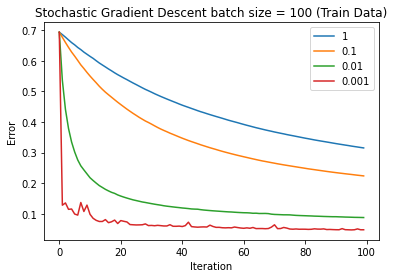

In [27]:
acc_train_SGD100 = []
learning_rate = [0.005,0.01,0.1,1]

for i in learning_rate:
  w,b,error = forward_SGD(100,new_x_train, new_y_train, i)
  acc_train_SGD100.append(accuracy(w,b,new_x_train, new_y_train))
  print(error)
  plt.plot(error)
plt.legend(['1', '0.1', '0.01', '0.001'])
plt.title('Stochastic Gradient Descent batch size = 100 (Train Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')



In [37]:
print ("Accuray of SGD for learning rate = 0.005 is ",acc_train_SGD100[0]*100 , "% ")
print ("Accuray of SGD for learning rate = 0.01 is ",acc_train_SGD100[1]*100 , "% ")
print ("Accuray of SGD for learning rate = 0.1 is ",acc_train_SGD100[2]*100 , "% ")
print ("Accuray of SGD for learning rate = 1 is ",acc_train_SGD100[3]*100 , "% ")

Accuray of SGD for learning rate = 0.005 is  96.40022907633151 % 
Accuray of SGD for learning rate = 0.01 is  96.58839892006871 % 
Accuray of SGD for learning rate = 0.1 is  97.52924813875481 % 
Accuray of SGD for learning rate = 1 is  98.50282254765605 % 


[0.6931471805599106, 0.6828892052771336, 0.6738792510131053, 0.6654224957404467, 0.6568973055093893, 0.6488499133820498, 0.640653023868148, 0.6328778817656818, 0.6255257275337555, 0.6178863158590118, 0.6104595052978463, 0.6034848935355199, 0.5961229801070848, 0.5890144401545891, 0.582123941484802, 0.5757191481168495, 0.5692969718137121, 0.5635156119853759, 0.5577794597621261, 0.5521842002274489, 0.5462737593130924, 0.5405664100342719, 0.5353876301378507, 0.530294804245403, 0.5252770423597533, 0.5199125738897007, 0.5145410708084098, 0.5098360716956885, 0.5054699780889524, 0.5007072260444392, 0.4963112909970179, 0.49146951747370976, 0.4871379322632943, 0.482174869123881, 0.47786595072320065, 0.47399830461995784, 0.4700609434279846, 0.4659448763716974, 0.46229237165760856, 0.45835195801689105, 0.45480527338374427, 0.45114802447060853, 0.44723372564274266, 0.44339505036123783, 0.44012908594739725, 0.43685206483295613, 0.43341472915833407, 0.42985532890029515, 0.42674782286301305, 0.4234475

Text(0, 0.5, 'Error')

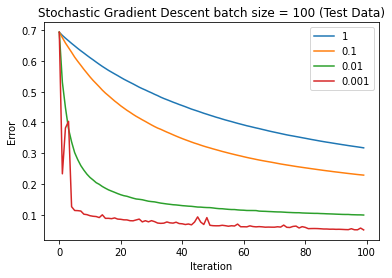

In [25]:
acc_test_SGD100 = []
learning_rate = [0.005,0.01,0.1,1]

for i in learning_rate:
  w,b,error = forward_SGD(100,new_x_test, new_y_test, i)
  acc_test_SGD100.append(accuracy(w,b,new_x_test, new_y_test))
  print(error)
  plt.plot(error)
plt.legend(['1', '0.1', '0.01', '0.001'])
plt.title('Stochastic Gradient Descent batch size = 100 (Test Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')

In [38]:
print ("Accuray of SGD for learning rate = 0.005 is ",acc_test_SGD100[0]*100 , "% ")
print ("Accuray of SGD for learning rate = 0.01 is ",acc_test_SGD100[1]*100 , "% ")
print ("Accuray of SGD for learning rate = 0.1 is ",acc_test_SGD100[2]*100 , "% ")
print ("Accuray of SGD for learning rate = 1 is ",acc_test_SGD100[3]*100 , "% ")

Accuray of SGD for learning rate = 0.005 is  95.58252427184466 % 
Accuray of SGD for learning rate = 0.01 is  95.92233009708738 % 
Accuray of SGD for learning rate = 0.1 is  97.03883495145631 % 
Accuray of SGD for learning rate = 1 is  98.44660194174757 % 
